In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test2=test.copy()

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
#Merging train,stores and features dataset
train_df = pd.merge(train,stores)
train = pd.merge(train_df,features)
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [6]:
train.shape

(421570, 16)

In [7]:
#Merging test,stores and features dataset
test_df = pd.merge(test,stores)
test = pd.merge(test_df,features)
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [8]:
test.shape

(115064, 15)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,115064.0,22.238207,12.809930,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,115064.0,44.339524,30.656410,1.000000,18.000000,37.000000,74.000000,99.000000
Size,115064.0,136497.688921,61106.926438,34875.000000,93638.000000,140167.000000,202505.000000,219622.000000
Temperature,115064.0,53.941804,18.724153,-7.290000,39.820000,54.470000,67.350000,101.950000
Fuel_Price,115064.0,3.581546,0.239442,2.872000,3.431000,3.606000,3.766000,4.125000
MarkDown1,114915.0,7689.216439,10698.760716,-2781.450000,1966.460000,4842.290000,9439.140000,103184.980000
MarkDown2,86437.0,3734.051729,8323.495014,-35.740000,180.350000,742.590000,2735.670000,71074.170000
MarkDown3,105235.0,2403.088666,13767.939313,-179.260000,15.100000,78.260000,272.580000,149483.310000
MarkDown4,102176.0,3356.219071,7570.501545,0.220000,155.460000,840.940000,3096.920000,65344.640000
MarkDown5,115064.0,3922.681189,19445.150745,-185.170000,1309.300000,2390.430000,4227.270000,771448.100000


C:\Users\Nithish\AppData\Local\Temp\ipykernel_1372\3014474467.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='BrBG',linewidths=2,fmt='.2f',annot = True)


<AxesSubplot:>

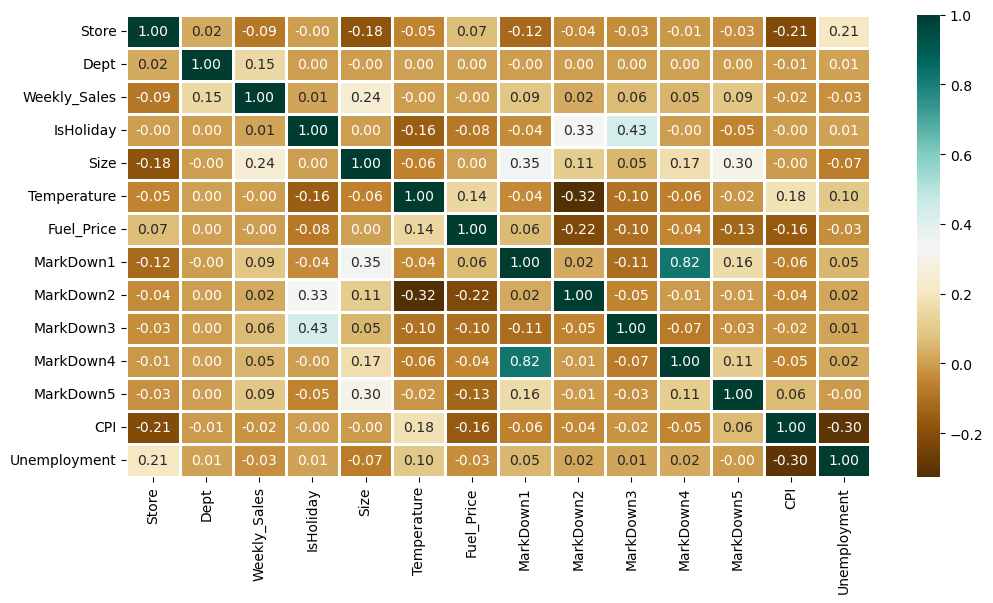

In [13]:
#To check corr of features
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),cmap='BrBG',linewidths=2,fmt='.2f',annot = True)

Based on the correlation, we can see that Markdown 1 and 4 are highly correlated,
Size has better correlation with dependent feature than others

<AxesSubplot:>

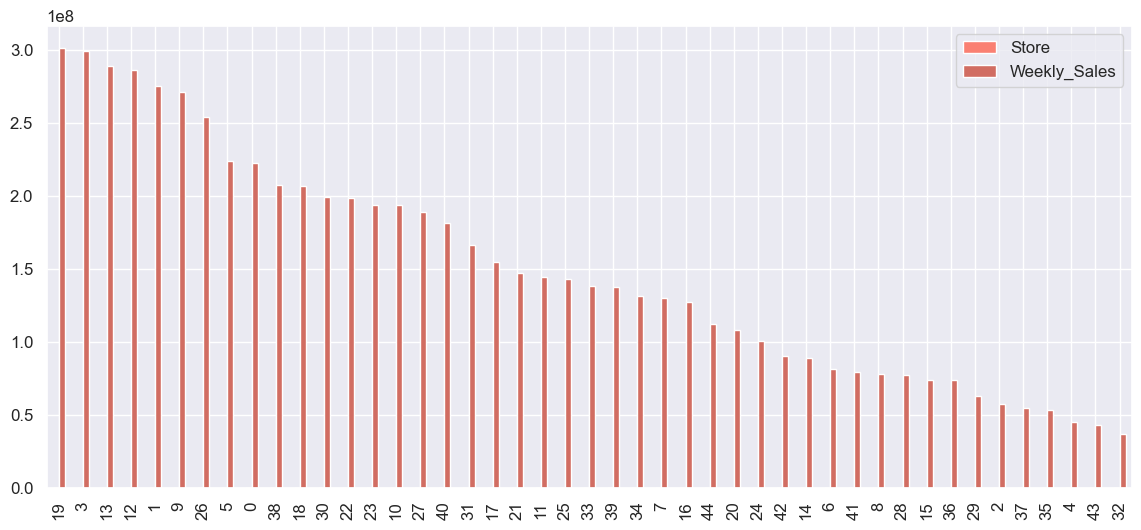

In [14]:
sns.set(rc={'figure.figsize':(14,6)}, palette="dark:salmon_r", font_scale=1.1)
train.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

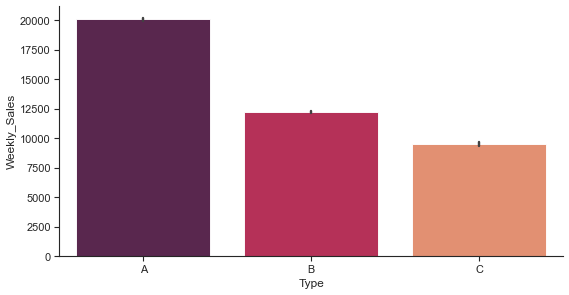

In [15]:
#Sales by type
plt.figure(figsize=(10,5),dpi=65)
sns.set_style('ticks')
sns.barplot(y=train['Weekly_Sales'], x=train['Type'], palette = 'rocket')
sns.despine()

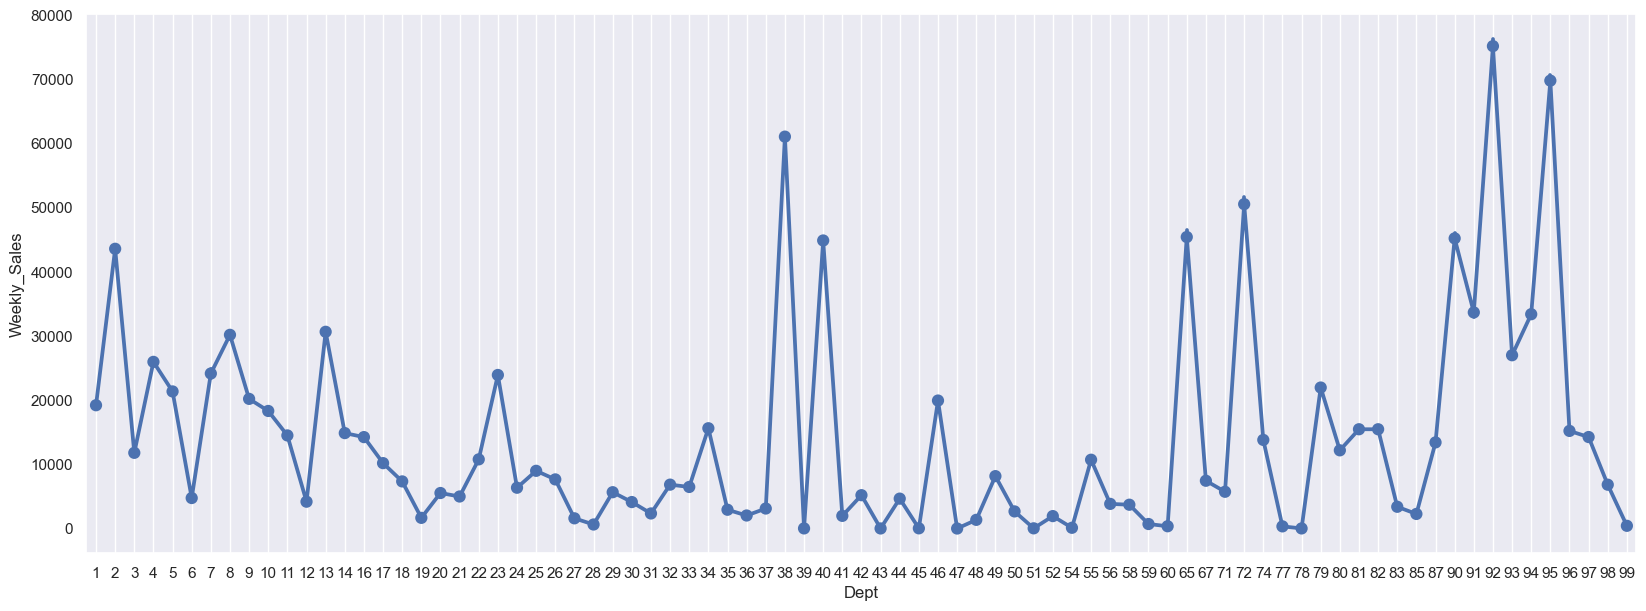

In [16]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(20,7)})
sns.pointplot(x="Dept", y="Weekly_Sales",data=train)
plt.grid()

# Data Cleaning

In [17]:
#Replacing the Negative values from features to 0
neg_feat = ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5']
for feature in neg_feat:
    try:
        train.loc[train[feature] < 0 ,feature] = 0
        test.loc[test[feature] < 0 ,feature] = 0
    except KeyError:
        print("Weekly sales will not be there at test data")

Weekly sales will not be there at test data


In [18]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [19]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

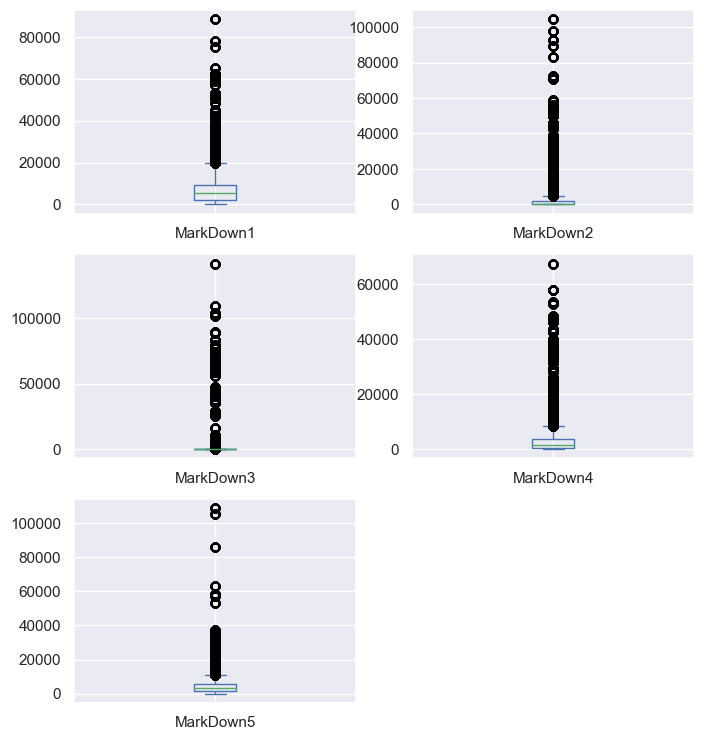

In [20]:
plt.figure(figsize=(8,9))
NullFeat = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in range(len(NullFeat)):
    ax = plt.subplot(3,2,i+1)
    ct = train[NullFeat[i]]
    ct.plot(kind='box',ax=ax,stacked=True)
    #plt.title(NullFeat[i])

plt.show()

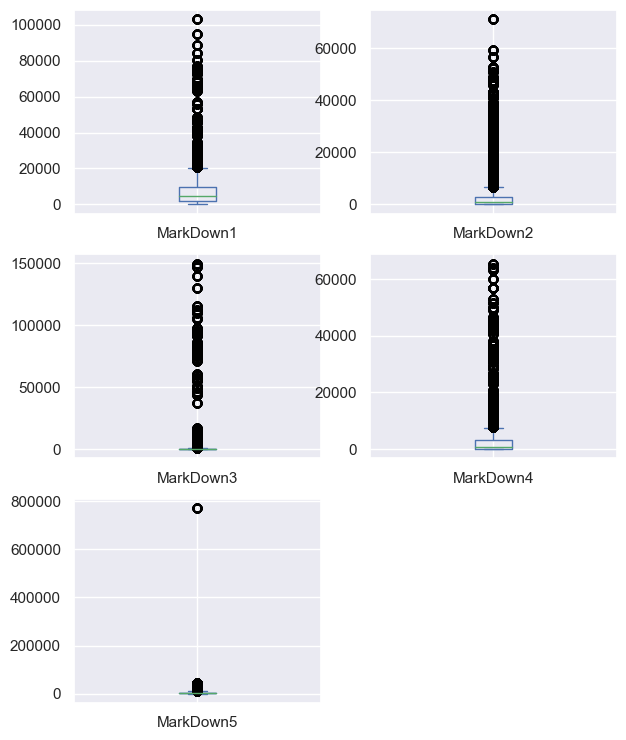

In [21]:
plt.figure(figsize=(7,9))
for i in range(len(NullFeat)):
    ax = plt.subplot(3,2,i+1)
    ct = test[NullFeat[i]]
    ct.plot(kind='box',ax=ax,stacked=True)
    #plt.title(NullFeat[i])

plt.show()

From the above plots its clear that the features have large number of outliers, hence it is better fill the NaN values with median

In [22]:
def fillNan(df,feature):
    df[feature] = df[feature].fillna(df[feature].median())
    
for i in NullFeat:
    fillNan(train,i)
    fillNan(test,i)

In [23]:
#Handle Nan Values of CPI and Unemployment of Test Data
#Store has better corr, but we are grouping by dept as our obj is find dept wide sales

test['CPI'] = test.groupby("Dept",group_keys=False)['CPI'].apply(lambda x: x.fillna(x.mean()))
test['Unemployment'] = test.groupby("Dept",group_keys=False)["Unemployment"].apply(lambda x: x.fillna(x.mean()))

# Feature Engineering

In [24]:
train['Date'].dtype

dtype('O')

In [25]:
#Converting the Dtype of date
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [26]:
#Extracting the features from data and creating new features 
train["Day"] = train["Date"].dt.day
train["Week"]=train['Date'].dt.week
train["Month"]=train['Date'].dt.month
train["Year"]=train['Date'].dt.year

test["Day"]=test['Date'].dt.day
test["Week"]=test['Date'].dt.week
test["Month"]=test['Date'].dt.month
test["Year"]=test['Date'].dt.year

C:\Users\Nithish\AppData\Local\Temp\ipykernel_1372\1661978116.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train["Week"]=train['Date'].dt.week
C:\Users\Nithish\AppData\Local\Temp\ipykernel_1372\1661978116.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test["Week"]=test['Date'].dt.week


In [27]:
train["Year"].value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [28]:
test["Year"].value_counts()

2013    88275
2012    26789
Name: Year, dtype: int64

In [29]:
#Initializing the dates of special events and creating new features based on that
events = {
    "SuperBowl" : [np.datetime64('2010-02-12'),np.datetime64('2011-02-11'),np.datetime64('2012-02-10'),np.datetime64('2013-02-08')],
    'labor': [np.datetime64('2010-09-10'), np.datetime64('2011-09-09'), np.datetime64('2012-09-07'), np.datetime64('2013-09-06')],
    'thanksgiving': [np.datetime64('2010-11-26'), np.datetime64('2011-11-25'), np.datetime64('2012-11-23'), np.datetime64('2013-11-29')],
    'christmas': [np.datetime64('2010-12-31'), np.datetime64('2011-12-30'), np.datetime64('2012-12-28'), np.datetime64('2013-12-27')]
}

for events,dates in events.items():
    train[events] = np.where(train.Date.isin(dates),1,0)
    test[events] = np.where(test.Date.isin(dates),1,0)  

In [30]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,SuperBowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2,44,11,2012,0,0,0,0


In [31]:
train['IsHoliday'] = pd.get_dummies(train["IsHoliday"], drop_first = True)
test['IsHoliday'] = pd.get_dummies(test["IsHoliday"], drop_first = True)

In [32]:
#Changing the values of Isholiday Columns according to special holidays
train['IsHoliday'] = train["IsHoliday"] | train["SuperBowl"] | train["labor"] | train["thanksgiving"] | train["christmas"]
test['IsHoliday'] = test["IsHoliday"] | test["SuperBowl"] | test["labor"] | test["thanksgiving"] | test["christmas"] 

In [33]:
train.drop(['SuperBowl',"labor","thanksgiving","christmas"],axis=1,inplace=True)
test.drop(['SuperBowl',"labor","thanksgiving","christmas"],axis=1,inplace=True)

In [34]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,5,5,2,2010
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,5,5,2,2010
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,5,5,2,2010
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,5,5,2,2010
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,5,5,2,2010


# Encoding

In [35]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test,drop_first=True)

C:\Users\Nithish\AppData\Local\Temp\ipykernel_1372\1754580909.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='BrBG',linewidths=2,fmt='.2f',annot = True)


<AxesSubplot:>

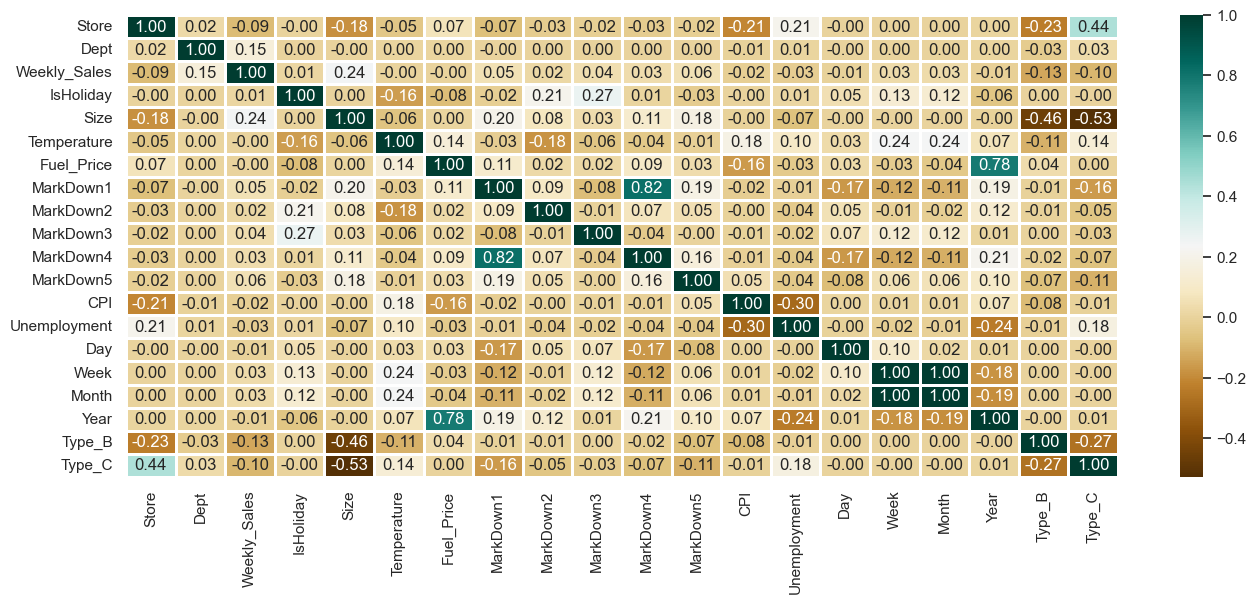

In [36]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),cmap='BrBG',linewidths=2,fmt='.2f',annot = True)

In [37]:
train.drop(['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment','Date'],axis=1,inplace=True)
test.drop(['MarkDown1', 'MarkDown5', 'Year' , 'Day', 'Month' , 'CPI', 'Unemployment','Date'],axis=1,inplace=True)

In [38]:
#Converting all float var int -> integer.
#For train 
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)

#For test
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)  

# Split the data

In [39]:
X = train.drop(["Weekly_Sales"],axis=1)
y = train['Weekly_Sales']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((295099, 12), (126471, 12), (295099,), (126471,))

In [42]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,Week,Type_B,Type_C
0,1,1,24924,0,151315,42,2,192,24,1481,5,0,0
1,1,2,50605,0,151315,42,2,192,24,1481,5,0,0
2,1,3,13740,0,151315,42,2,192,24,1481,5,0,0
3,1,4,39954,0,151315,42,2,192,24,1481,5,0,0
4,1,5,32229,0,151315,42,2,192,24,1481,5,0,0


# Model Implementation

In [43]:
from sklearn.model_selection import GridSearchCV, KFold
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [45]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
LR_Pred = LRmodel.predict(X_test)
LR_acc = round(LRmodel.score(X_test,y_test)*100,2)
print('Accuracy of Linear Regression model: '+str(LR_acc) +'%')

Accuracy of Linear Regression model: 9.15%


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

In [47]:
RFModel = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
RFModel.fit(X_train, y_train)
RF_Pred = RFModel.predict(X_test)
RF_acc = round(RFModel.score( X_test,y_test)*100,2)
print('Accuracy of Random Forest model: '+str(RF_acc) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.7s


building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   27.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s


Accuracy of Random Forest model: 97.06%


[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    1.3s finished


In [48]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
DT_Pred = reg.predict(X_test)
DT_acc = round(reg.score(X_test,y_test)*100,2)
print("Accuracy of Decision Tree Model: "+str(DT_acc)+'%')

Accuracy of Decision Tree Model: 95.07%


In [50]:
#MSE and R2 score for the models
def MSE_R2(pred):
    mse = mean_squared_error(y_test,pred)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return mse,r2,mae
    
LR_MSE, LR_R2, LR_MAE = MSE_R2(LR_Pred)
RF_MSE, RF_R2,RF_MAE = MSE_R2(RF_Pred)
DT_MSE, DT_R2,DT_MAE = MSE_R2(DT_Pred)

In [52]:
models = pd.DataFrame({
    "Model" : ["DecisionTree", "RandomForest","LinearRegression"],
    "Accuracy" : [DT_acc,RF_acc,LR_acc],
    "R2 Score" : [DT_R2,RF_R2,LR_R2],
    "MSE" : [DT_MSE,RF_MSE,LR_MSE],
    "MAE" : [DT_MAE,RF_MAE,LR_MAE]
    
    
})

In [53]:
models.sort_values(by='Accuracy',ascending= False)

,Model,Accuracy,R2 Score,MSE,MAE
1,RandomForest,97.06,0.97,15370195.75,1506.08
0,DecisionTree,95.07,0.95,25777121.37,1935.67
2,LinearRegression,9.15,0.09,474710736.17,14595.19


In [66]:
#Predicting weekly sales for test data

RF_Pred = RFModel.predict(test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    0.4s finished


In [67]:
PredictedVal = pd.concat([test['Store'], test['Dept'], test2['Date']], axis=1)
PredictedVal['WeeklySales'] = RF_Pred
PredictedVal.to_csv('PredictedStatus.csv', index=False)

In [68]:
PredictedVal

,Store,Dept,Date,WeeklySales
0,1,1,2012-11-02,31615.86
1,1,2,2012-11-09,46686.32
2,1,3,2012-11-16,10069.08
3,1,4,2012-11-23,38607.46
4,1,5,2012-11-30,31198.03
...,...,...,...,...
115059,45,93,2013-06-28,3385.51
115060,45,94,2013-07-05,4194.19
115061,45,95,2013-07-12,54065.62
115062,45,97,2013-07-19,6415.30
